In [1]:
# Import library:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import pandas as pd
import csv

# قراءة الملفات مع تخطي الصفوف التي تحتوي على أخطاء
test = pd.read_csv('/content/test 2.csv', on_bad_lines='skip', delimiter=',', quoting=csv.QUOTE_MINIMAL)
submit = pd.read_csv('/content/submit (2).csv', on_bad_lines='skip', delimiter=',', quoting=csv.QUOTE_MINIMAL)
train = pd.read_csv('/content/train 3.csv', on_bad_lines='skip', delimiter=',', quoting=csv.QUOTE_MINIMAL)

# دمج البيانات في DataFrame واحد
fakenews = pd.concat([train, test, submit], ignore_index=True)

# حفظ البيانات المدمجة في ملف CSV جديد
fakenews.to_csv('/content/fakenews.csv', index=False)

print("تم دمج البيانات وحفظ النتائج في 'fakenews.csv'")



تم دمج البيانات وحفظ النتائج في 'fakenews.csv'


In [5]:
fakenews.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1.0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1.0


In [6]:
fakenews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31200 entries, 0 to 31199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      31200 non-null  int64  
 1   title   25320 non-null  object 
 2   author  23540 non-null  object 
 3   text    25954 non-null  object 
 4   label   26000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ MB


In [7]:
fakenews.describe().T

,count,mean,std,min,25%,50%,75%,max
id,31200.0,14732.833333,7895.835633,0.0,7799.75,15599.5,22099.25,25999.0
label,26000.0,0.510538,0.499899,0.0,0.00,1.0,1.00,1.0


In [8]:
import pandas as pd

# Load the CSV files
train = pd.read_csv('/content/train 3.csv')

# Print the column names
print("Columns in train dataset:", train.columns)


Columns in train dataset: Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [9]:
# Check the unique values in the 'label' column
print(train['label'].value_counts())

label
1    10413
0    10387
Name: count, dtype: int64


In [10]:
# Optionally, rename 'label' to something more descriptive

train.rename(columns={'label': 'reliability'}, inplace=True)

# Print the updated column value counts
print(train['reliability'].value_counts())

reliability
1    10413
0    10387
Name: count, dtype: int64


ما معنى الأرقام:

الأرقام (1 = 10413 و 0 = 10387) تمثل توزيع الأعمدة في بيانات label:

1 = نصوص غير موثوقة (عددها 10413). 0 = نصوص موثوقة (عددها 10387).

Balance of the Dataset:
The dataset is very close to being balanced, with nearly an equal number of reliable (0) and unreliable (1) entries. Specifically:


Unreliable (1): 10,413 entries
Reliable (0): 10,387 entries


How balanced is the dataset?

The difference between the two classes (unreliable vs. reliable) is only 26 entries, which means that the dataset is nearly perfectly balanced.
This slight imbalance is not significant and is unlikely to negatively affect your model’s performance.

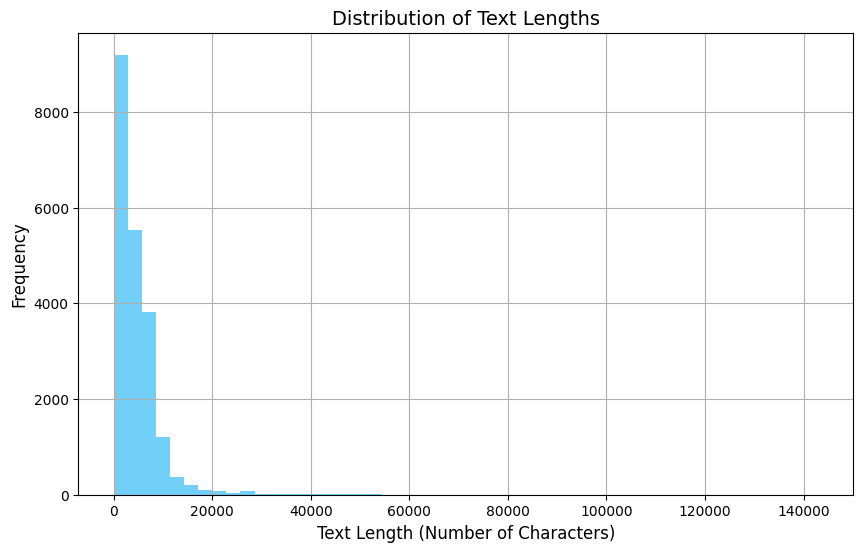

In [11]:
import matplotlib.pyplot as plt

# Plot a histogram of the lengths of the 'text' column with a cohesive color
train['text'].str.len().hist(bins=50, figsize=(10,6), color='#4fc3f7', alpha=0.8)

# Add labels and title
plt.title('Distribution of Text Lengths', fontsize=14)
plt.xlabel('Text Length (Number of Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


ما معنى الأرقام:


الأرقام (1 = 10413 و 0 = 10387) تمثل توزيع الأعمدة في بيانات label:

1 = نصوص غير موثوقة (عددها 10413).
0 = نصوص موثوقة (عددها 10387).

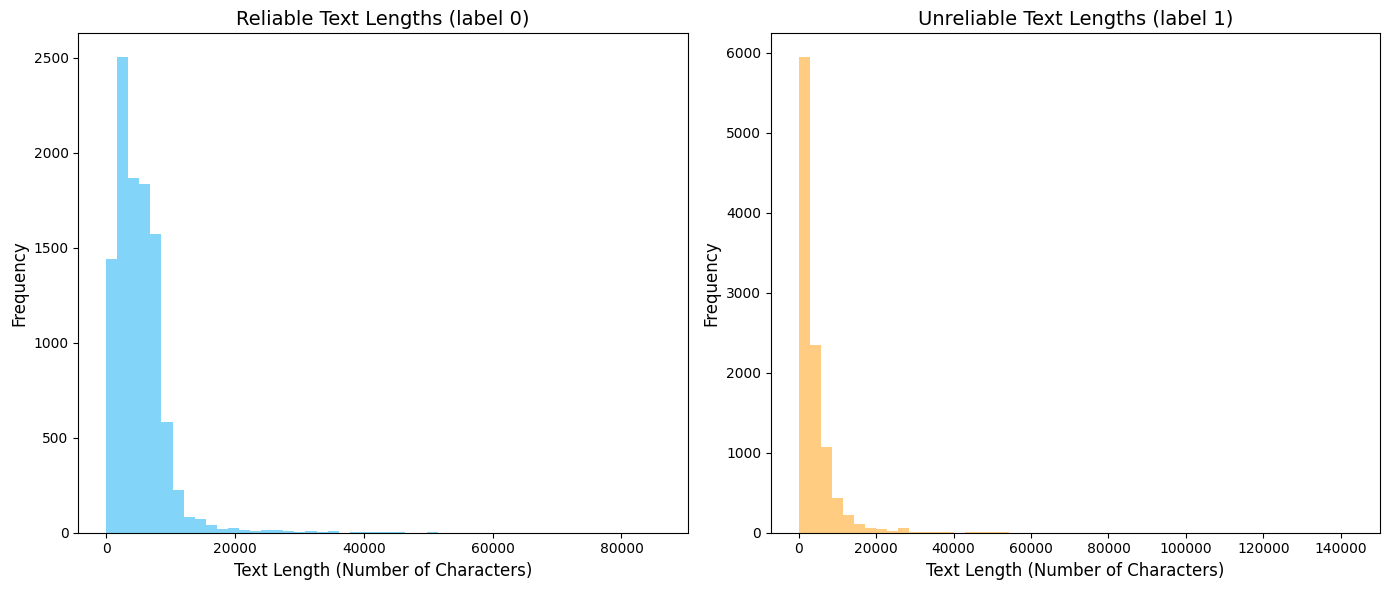

In [12]:
import matplotlib.pyplot as plt

# Create two subplots (one for reliable texts and one for unreliable texts)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of reliable text lengths (label = 0) with a light blue color
ax1.hist(fakenews[fakenews['label'] == 0]['text'].str.len(), bins=50, color='#4fc3f7', alpha=0.7)
ax1.set_title('Reliable Text Lengths (label 0)', fontsize=14)
ax1.set_xlabel('Text Length (Number of Characters)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

# Plot the distribution of unreliable text lengths (label = 1) with a light orange color
ax2.hist(fakenews[fakenews['label'] == 1]['text'].str.len(), bins=50, color='#ffb74d', alpha=0.7)
ax2.set_title('Unreliable Text Lengths (label 1)', fontsize=14)
ax2.set_xlabel('Text Length (Number of Characters)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()



In [16]:
pip install wordcloud matplotlib

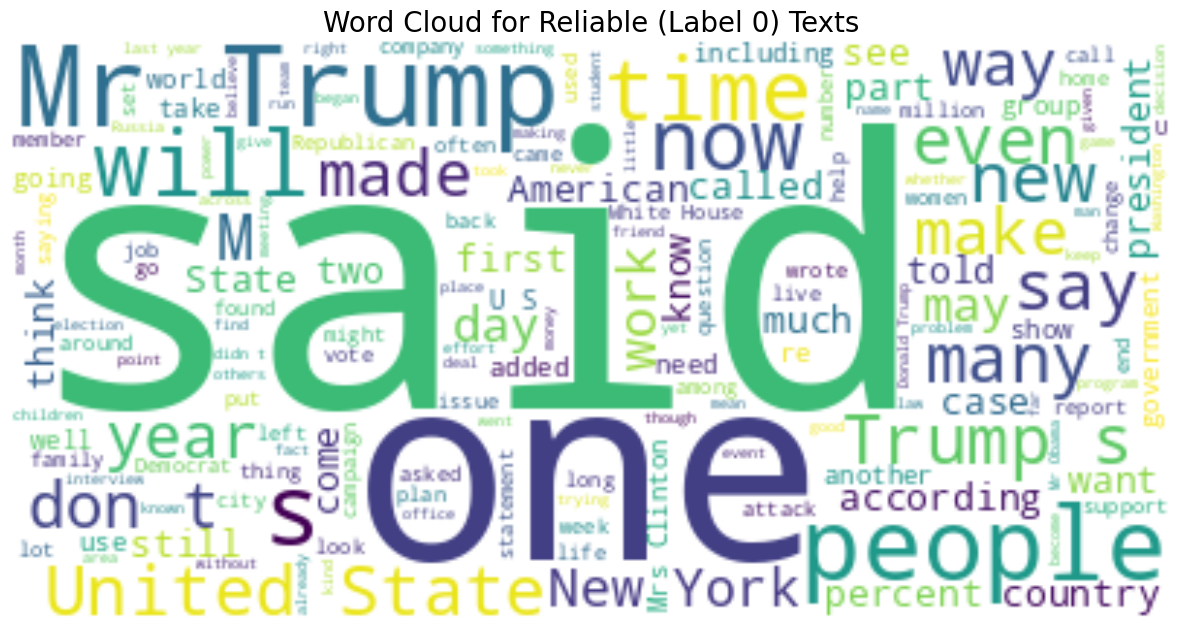

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fill NaN values with an empty string and ensure all text values are strings
fakenews['text'] = fakenews['text'].fillna('').astype(str)

# Join all the texts that are classified as reliable (label == 0) into one large string
text = " ".join(i for i in fakenews[fakenews['label'] == 0]['text'])

# Generate the word cloud
wordcloud = WordCloud(background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axis
plt.title('Word Cloud for Reliable (Label 0) Texts', fontsize=20)
plt.show()

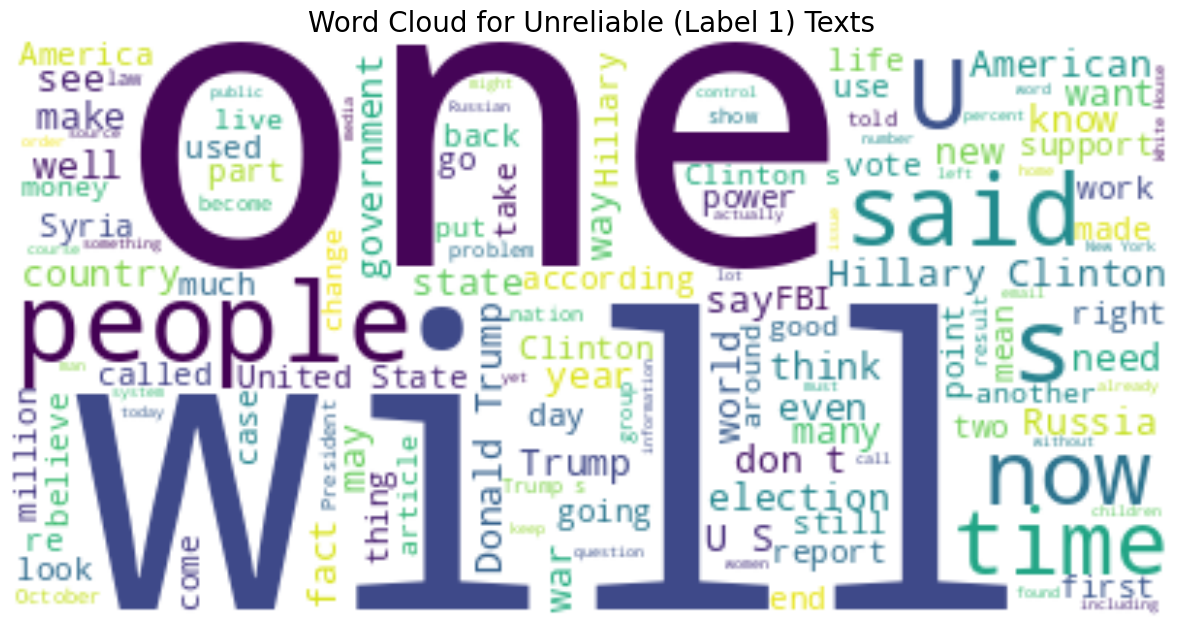

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fill NaN values with an empty string and ensure all text values are strings
fakenews['text'] = fakenews['text'].fillna('').astype(str)

# Join all the texts that are classified as unreliable (label == 1) into one large string
text = " ".join(i for i in fakenews[fakenews['label'] == 1]['text'])

# Generate the word cloud
wordcloud = WordCloud(background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axis
plt.title('Word Cloud for Unreliable (Label 1) Texts', fontsize=20)
plt.show()


الصورة الأولى (Word Cloud للنصوص غير الموثوقة - Label 1):

الكلمات الكبيرة مثل "will" و "one" و "people" و "said" هي الكلمات الأكثر تكرارًا في النصوص التي تم تصنيفها على أنها غير موثوقة (Label = 1).
هذا يعني أن هذه الكلمات تظهر بشكل متكرر في النصوص غير الموثوقة، مثل المقالات التي ربما تحتوي على معلومات غير دقيقة أو مضللة.
الصورة الثانية (Word Cloud للنصوص الموثوقة - Label 0):



الكلمات الكبيرة مثل "said" و "Mr" و "Trump" و "one" و "people" هي الكلمات الأكثر تكرارًا في النصوص التي تم تصنيفها على أنها موثوقة (Label = 0).
هذا يشير إلى أن هذه الكلمات تظهر كثيرًا في المقالات التي تم اعتبارها موثوقة وذات معلومات دقيقة.
ما الفائدة؟


Word Clouds تساعد في فهم الكلمات المفتاحية الأكثر استخدامًا في النصوص الموثوقة وغير الموثوقة.
قد تجد أن النصوص غير الموثوقة تركز على مواضيع معينة أو تستخدم كلمات معينة بشكل متكرر، مما قد يساعد في فهم الأنماط في المحتوى غير الموثوق.
في المقابل، النصوص الموثوقة قد تستخدم كلمات تعبر عن مواضيع متكررة، مثل الأخبار الرسمية أو المصادر المؤكدة.


In [19]:
import re

# Function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply the cleaning function
fakenews['cleaned_text'] = fakenews['text'].apply(clean_text)


In [20]:
fakenews['text'] = fakenews['text'].str.lower()

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Remove stopwords
fakenews['cleaned_text'] = fakenews['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Fill missing values with an empty string
fakenews['text'] = fakenews['text'].fillna('')

In [23]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
fakenews['cleaned_text'] = fakenews['cleaned_text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [24]:
fakenews = fakenews.drop_duplicates(subset='text')

In [25]:
fakenews['cleaned_text'] = fakenews['cleaned_text'].str.strip()

<ipython-input-25-184470a3aa7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakenews['cleaned_text'] = fakenews['cleaned_text'].str.strip()


In [26]:
import re

# Define a dictionary of common contractions
contractions = {
    "can't": "cannot",
    "won't": "will not",
    "i'm": "i am",
    "they're": "they are",
    "it's": "it is",
    "he's": "he is",
    "she's": "she is",
    "isn't": "is not",
    "aren't": "are not",
    "didn't": "did not",
    "don't": "do not",
    "i've": "i have",
    "you've": "you have",
    "we've": "we have",
    "they've": "they have",
    "i'll": "i will",
    "you'll": "you will",
    "we'll": "we will",
    "they'll": "they will",
    "i'd": "i would",
    "you'd": "you would",
    "he'd": "he would",
    "she'd": "she would",
    "we'd": "we would",
    "they'd": "they would",
    "let's": "let us",
    "what's": "what is",
    "that's": "that is",
    "who's": "who is",
    "there's": "there is"
    # Add more as needed
}

# Function to replace contractions
def replace_contractions(text):
    for contraction, full_form in contractions.items():
        # Replace contractions with their full forms using regex
        text = re.sub(r'\b' + contraction + r'\b', full_form, text)
    return text

# Apply the function to your text data
fakenews['cleaned_text'] = fakenews['cleaned_text'].apply(replace_contractions)


<ipython-input-26-1d2b88692d07>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakenews['cleaned_text'] = fakenews['cleaned_text'].apply(replace_contractions)


In [27]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    # Get the polarity score using TextBlob
    polarity = TextBlob(text).sentiment.polarity
    # Determine the sentiment based on polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'text' column to create the 'sentiment' column
fakenews['sentiment'] = fakenews['text'].apply(get_sentiment)

# Check the new 'sentiment' column
print(fakenews[['text', 'sentiment']].head())


                                                text sentiment
0  house dem aide: we didn’t even see comey’s let...  positive
1  ever get the feeling your life circles the rou...  positive
2  why the truth might get you fired october 29, ...  positive
3  videos 15 civilians killed in single us airstr...  positive
4  print \nan iranian woman has been sentenced to...  negative


<ipython-input-27-cc2dca5b3e17>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakenews['sentiment'] = fakenews['text'].apply(get_sentiment)


In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def vader_sentiment(text):
    score = sid.polarity_scores(text)  # Get sentiment polarity scores
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'text' column
fakenews['sentiment'] = fakenews['text'].apply(vader_sentiment)

# Check the results
print(fakenews[['text', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                text sentiment
0  house dem aide: we didn’t even see comey’s let...  positive
1  ever get the feeling your life circles the rou...  negative
2  why the truth might get you fired october 29, ...  positive
3  videos 15 civilians killed in single us airstr...  negative
4  print \nan iranian woman has been sentenced to...  negative


<ipython-input-28-15cbc0906791>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakenews['sentiment'] = fakenews['text'].apply(vader_sentiment)


In [29]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

# تحميل قائمة الكلمات التوقفية (stopwords) من مكتبة NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# افتراضًا أن dt هو DataFrame الذي يحتوي على عمود 'text'
# إزالة الكلمات التوقفية من النصوص
fakenews['no_sw'] = fakenews['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# عرض أول بضعة أسطر من DataFrame بعد إزالة الكلمات التوقفية
print(fakenews[['text', 'no_sw']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  house dem aide: we didn’t even see comey’s let...   
1  ever get the feeling your life circles the rou...   
2  why the truth might get you fired october 29, ...   
3  videos 15 civilians killed in single us airstr...   
4  print \nan iranian woman has been sentenced to...   

                                               no_sw  
0  house dem aide: didn’t even see comey’s letter...  
1  ever get feeling life circles roundabout rathe...  
2  truth might get fired october 29, 2016 tension...  
3  videos 15 civilians killed single us airstrike...  
4  print iranian woman sentenced six years prison...  


<ipython-input-29-4a7c6410a232>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakenews['no_sw'] = fakenews['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


 النتيجة التي حصلت عليها بعد إزالة الكلمات التوقفية
  تم حذف الكلمات الشائعة التي لا تضيف قيمة كبيرة إلى معنى الجملة، مثل

 "the"، "is"، "and"، "in" وغيرها

In [30]:
from collections import Counter
import pandas as pd

# إنشاء كائن من Counter لحساب تكرار الكلمات
cnt = Counter()

# حساب تكرار الكلمات لكل نص في عمود 'no_sw' الذي يحتوي على النصوص بدون كلمات توقف
for text in fakenews["no_sw"].values:
    for word in text.split():
        cnt[word] += 1

# استخراج أكثر 10 كلمات تكرارًا
most_common_words = cnt.most_common(10)

# تحويل النتائج إلى DataFrame
temp = pd.DataFrame(most_common_words)
temp.columns = ['word', 'count']  # تعيين أسماء الأعمدة
temp  # عرض DataFrame الذي يحتوي على الكلمات الأكثر تكرارًا وتكرارها


,word,count
0,mr.,82266
1,—,59560
2,said,59337
3,”,58558
4,would,45903
5,trump,45237
6,one,42500
7,new,35991
8,people,35638
9,also,30602


In [31]:
import re

# دالة لتنظيف النصوص وإزالة الرموز الخاصة
def clean_text(text):
    # إزالة الرموز الخاصة وعلامات الترقيم
    text = re.sub(r'[^\w\s]', '', text)
    return text

# تطبيق الدالة على عمود النصوص 'no_sw'
fakenews['cleaned_no_sw'] = fakenews['no_sw'].apply(clean_text)

# إعادة حساب الكلمات الأكثر تكرارًا بعد التنظيف
cnt = Counter()
for text in fakenews["cleaned_no_sw"].values:
    for word in text.split():
        cnt[word] += 1

# استخراج أكثر 10 كلمات تكرارًا بعد التنظيف
most_common_words = cnt.most_common(10)

# تحويل النتائج إلى DataFrame
temp = pd.DataFrame(most_common_words)
temp.columns = ['word', 'count']  # تعيين أسماء الأعمدة
temp  # عرض النتائج بعد التنظيف


<ipython-input-31-1348de269a47>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakenews['cleaned_no_sw'] = fakenews['no_sw'].apply(clean_text)


,word,count
0,said,100722
1,mr,83363
2,trump,55583
3,one,46497
4,would,46410
5,people,43586
6,new,37096
7,like,32219
8,also,31610
9,us,31336


In [71]:
import plotly.express as px


fig = px.bar(temp, x="count", y="word",
             title='Common Words in Text',
             orientation='h',
             width=500,
             height=500,
             color_discrete_sequence=['#4fc3f7'])  # تحديد اللون

fig.show()


In [73]:
import plotly.express as px


fig = px.bar(temp, x="count", y="word",
             title='Common Words in Text',
             orientation='h',
             width=500,
             height=500,
             color_discrete_sequence=['#4fc3f7'])  # تحديد اللون

fig.show()

In [33]:
# تحديد الكلمات الأكثر تكرارًا
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

# دالة لإزالة الكلمات الأكثر تكرارًا من النصوص
def remove_freqwords(text):
    """دالة مخصصة لإزالة الكلمات الأكثر تكرارًا"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

# تطبيق الدالة على عمود 'no_sw' لإنشاء عمود جديد 'wo_stopfreq'
fakenews["wo_stopfreq"] = fakenews["no_sw"].apply(lambda text: remove_freqwords(text))

# عرض النتائج
fakenews[['no_sw', 'wo_stopfreq']].head()


<ipython-input-33-9749e33b8d64>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakenews["wo_stopfreq"] = fakenews["no_sw"].apply(lambda text: remove_freqwords(text))


,no_sw,wo_stopfreq
0,house dem aide: didn’t even see comey’s letter...,house dem aide: didn’t even see comey’s letter...
1,ever get feeling life circles roundabout rathe...,ever get feeling life circles roundabout rathe...
2,"truth might get fired october 29, 2016 tension...","truth might get fired october 29, 2016 tension..."
3,videos 15 civilians killed single us airstrike...,videos 15 civilians killed single airstrike id...
4,print iranian woman sentenced six years prison...,print iranian woman sentenced six years prison...


In [34]:
# تحديد الكلمات الأكثر تكرارًا
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

# دالة لعرض الكلمات التي تم حذفها من كل جملة
def highlight_removed_words(text):
    """تُظهر الكلمات التي تم إزالتها من النص"""
    words_in_text = text.split()
    removed_words = [word for word in words_in_text if word in FREQWORDS]
    return removed_words

# تطبيق الدالة على عمود 'no_sw' لمعرفة الكلمات التي تم حذفها
fakenews['removed_words'] = fakenews['no_sw'].apply(highlight_removed_words)

# عرض النتائج
fakenews[['no_sw', 'removed_words']].head()


<ipython-input-34-3211fd77be32>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakenews['removed_words'] = fakenews['no_sw'].apply(highlight_removed_words)


,no_sw,removed_words
0,house dem aide: didn’t even see comey’s letter...,"[like, also, one, like, also]"
1,ever get feeling life circles roundabout rathe...,"[like, us, new, one, said, us, people, people,..."
2,"truth might get fired october 29, 2016 tension...","[one, also, would, one, us, like, us]"
3,videos 15 civilians killed single us airstrike...,"[us, us, us, us, one, us, said, said, people, ..."
4,print iranian woman sentenced six years prison...,[]


In [35]:
fakenews['no_sw'].loc[5]

'trying times, jackie mason voice reason. [in week’s exclusive clip breitbart news, jackie discusses looming threat north korea, explains president donald trump could win support hollywood left u. s. needs strike first. “if decides bomb them, whole country behind him, everybody realize choice thing do,” jackie says. “except hollywood left. they’ll get nauseous. ” “[trump] could win left over, they’ll fall love minute. bombed better reason,” jackie explains. “like transgender toilets. ” jackie also says it’s surprise hollywood celebrities didn’t support trump’s strike syrian airfield month. “they infuriated,” says. “because might save lives. doesn’t mean anything them. saved environment, climate change! they’d happiest people world. ” still, jackie says he’s got nothing hollywood celebs. they’ve got tough life country. watch jackie’s latest clip above. follow daniel nussbaum twitter: @dznussbaum'

In [36]:
fakenews['wo_stopfreq'].loc[5]

'trying times, jackie mason voice reason. [in week’s exclusive clip breitbart news, jackie discusses looming threat north korea, explains president donald could win support hollywood left u. s. needs strike first. “if decides bomb them, whole country behind him, everybody realize choice thing do,” jackie says. “except hollywood left. they’ll get nauseous. ” “[trump] could win left over, they’ll fall love minute. bombed better reason,” jackie explains. “like transgender toilets. ” jackie says it’s surprise hollywood celebrities didn’t support trump’s strike syrian airfield month. “they infuriated,” says. “because might save lives. doesn’t mean anything them. saved environment, climate change! they’d happiest world. ” still, jackie says he’s got nothing hollywood celebs. they’ve got tough life country. watch jackie’s latest clip above. follow daniel nussbaum twitter: @dznussbaum'

In [37]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# تحميل WordNet corpus الذي يحتاجه WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# تهيئة lemmatizer
wordnet_lem = WordNetLemmatizer()

# دالة لتطبيق Lemmatization على كل كلمة في النص
def lemmatize_text(text):
    return " ".join([wordnet_lem.lemmatize(word) for word in text.split()])

# تطبيق Lemmatization على العمود 'wo_stopfreq' وتخزين النتائج في عمود جديد 'wo_stopfreq_lem'
fakenews['wo_stopfreq_lem'] = fakenews['wo_stopfreq'].apply(lemmatize_text)

# عرض النتائج
fakenews[['wo_stopfreq', 'wo_stopfreq_lem']].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-37-babb2529a383>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakenews['wo_stopfreq_lem'] = fakenews['wo_stopfreq'].apply(lemmatize_text)


,wo_stopfreq,wo_stopfreq_lem
0,house dem aide: didn’t even see comey’s letter...,house dem aide: didn’t even see comey’s letter...
1,ever get feeling life circles roundabout rathe...,ever get feeling life circle roundabout rather...
2,"truth might get fired october 29, 2016 tension...","truth might get fired october 29, 2016 tension..."
3,videos 15 civilians killed single airstrike id...,video 15 civilian killed single airstrike iden...
4,print iranian woman sentenced six years prison...,print iranian woman sentenced six year prison ...


In [38]:
# التأكد من أن لديك الأعمدة المطلوبة
fakenews = fakenews[['text', 'sentiment', 'no_sw', 'wo_stopfreq', 'wo_stopfreq_lem']]


In [39]:

# عرض أول 5 أسطر من الجدول 'fakenews'
fakenews.head()


,text,sentiment,no_sw,wo_stopfreq,wo_stopfreq_lem
0,house dem aide: we didn’t even see comey’s let...,positive,house dem aide: didn’t even see comey’s letter...,house dem aide: didn’t even see comey’s letter...,house dem aide: didn’t even see comey’s letter...
1,ever get the feeling your life circles the rou...,negative,ever get feeling life circles roundabout rathe...,ever get feeling life circles roundabout rathe...,ever get feeling life circle roundabout rather...
2,"why the truth might get you fired october 29, ...",positive,"truth might get fired october 29, 2016 tension...","truth might get fired october 29, 2016 tension...","truth might get fired october 29, 2016 tension..."
3,videos 15 civilians killed in single us airstr...,negative,videos 15 civilians killed single us airstrike...,videos 15 civilians killed single airstrike id...,video 15 civilian killed single airstrike iden...
4,print \nan iranian woman has been sentenced to...,negative,print iranian woman sentenced six years prison...,print iranian woman sentenced six years prison...,print iranian woman sentenced six year prison ...


In [40]:
# create the cleaned data for the train-test split:
nb=fakenews.drop(columns=['text','no_sw', 'wo_stopfreq'])
nb.columns=['sentiment','review']
nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]
nb

,sentiment,review
0,1,house dem aide: didn’t even see comey’s letter...
1,0,ever get feeling life circle roundabout rather...
2,1,"truth might get fired october 29, 2016 tension..."
3,0,video 15 civilian killed single airstrike iden...
4,0,print iranian woman sentenced six year prison ...
...,...,...
25995,0,"dysfunction plague world’s megacities, none ma..."
25996,0,washington — gov. john kasich ohio tuesday sig...
25997,0,good morning. (want get california today email...
25998,0,« previous - next » 300 marine deployed russia...


In [41]:
tokenized_review=nb['review'].apply(lambda x: x.split())
tokenized_review.head(5)

,review
0,"[house, dem, aide:, didn’t, even, see, comey’s..."
1,"[ever, get, feeling, life, circle, roundabout,..."
2,"[truth, might, get, fired, october, 29,, 2016,..."
3,"[video, 15, civilian, killed, single, airstrik..."
4,"[print, iranian, woman, sentenced, six, year, ..."


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['review'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [44]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [45]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 77.65%
------------------------------------------------
Confusion Matrix:
      0     1
0  1645   583
1   554  2305
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      2228
           1       0.80      0.81      0.80      2859

    accuracy                           0.78      5087
   macro avg       0.77      0.77      0.77      5087
weighted avg       0.78      0.78      0.78      5087



In [46]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 77.75%
------------------------------------------------
Confusion Matrix:
      0     1
0  1629   599
1   533  2326
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      2228
           1       0.80      0.81      0.80      2859

    accuracy                           0.78      5087
   macro avg       0.77      0.77      0.77      5087
weighted avg       0.78      0.78      0.78      5087



In [47]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 77.55%
------------------------------------------------
Confusion Matrix:
      0     1
0  1610   618
1   524  2335
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      2228
           1       0.79      0.82      0.80      2859

    accuracy                           0.78      5087
   macro avg       0.77      0.77      0.77      5087
weighted avg       0.77      0.78      0.77      5087



In [50]:
!pip install matplotlib scikit-learn

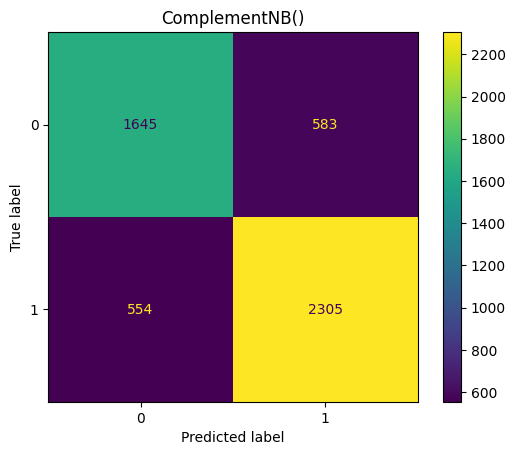

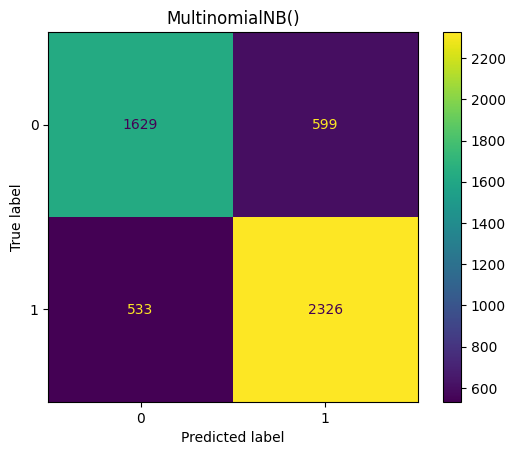

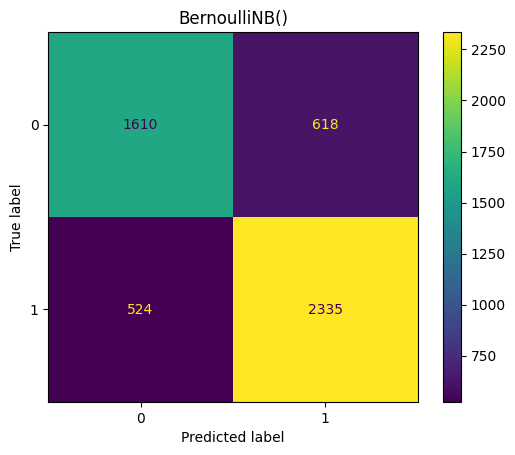

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# تجاهل التحذيرات
import warnings
warnings.filterwarnings("ignore")

# افتراض أن CNB، MNB، و BNB هي النماذج التي قمت بتدريبها
k = [CNB, MNB, BNB]
for model in k:
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(str(model))  # تحويل النموذج إلى نص للعنوان
    plt.show()


0.8336411897796057 0.8333480118533365 0.8398381940428129


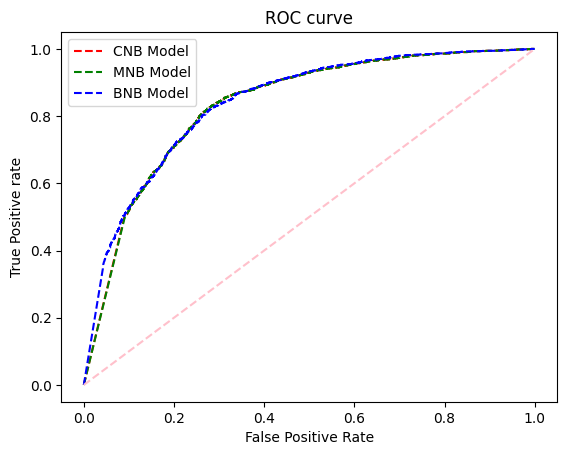

In [53]:
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models:
CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# ** TF-IDF: Term Frequency-Inverse Document Frequency**

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(nb['review'])

In [55]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, nb['sentiment'],test_size=0.20,random_state=30)

In [57]:
#fitting the model with MNB
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 72.01%


In [58]:
#fitting the model with BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_bnb = 73.80%


In [59]:
# fitting the model with CNB
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

accuracy_score_cnb = 73.36%


Accuracy: 76.15%


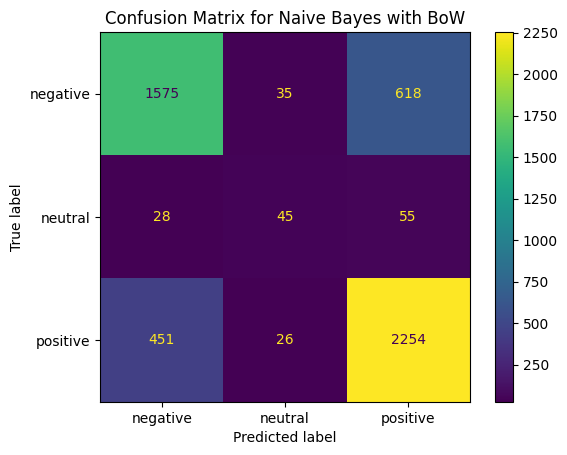

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# 1. تحويل النصوص إلى تمثيل BoW باستخدام CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(fakenews['text'])  # تحويل النصوص إلى تمثيل عددي BoW
y = fakenews['sentiment']  # تحديد تصنيفات المشاعر

# 2. تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

# 3. تدريب نموذج Naive Bayes وتقييمه باستخدام BoW
model = MultinomialNB()
model.fit(X_train, y_train)  # تدريب النموذج

# 4. التنبؤ واختبار الدقة
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 5. رسم مصفوفة الارتباك
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix for Naive Bayes with BoW")
plt.show()


Accuracy: 68.61%


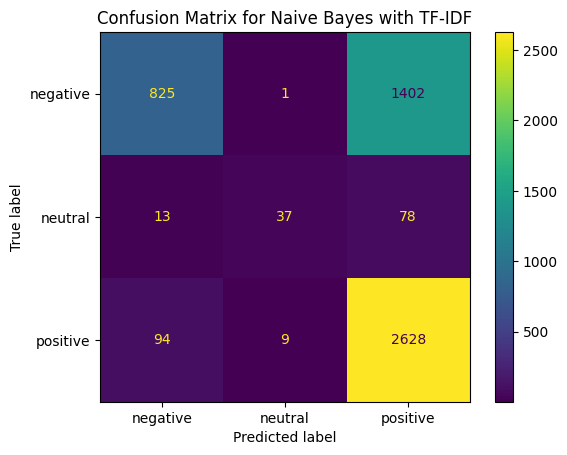

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# 1. تحويل النصوص إلى تمثيل TF-IDF باستخدام TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(fakenews['text'])  # تحويل النصوص إلى تمثيل عددي TF-IDF
y = fakenews['sentiment']  # تحديد تصنيفات المشاعر

# 2. تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

# 3. تدريب نموذج Naive Bayes وتقييمه باستخدام TF-IDF
model = MultinomialNB()
model.fit(X_train, y_train)  # تدريب النموذج

# 4. التنبؤ واختبار الدقة
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 5. رسم مصفوفة الارتباك
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix for Naive Bayes with TF-IDF")
plt.show()


Accuracy: 81.88%


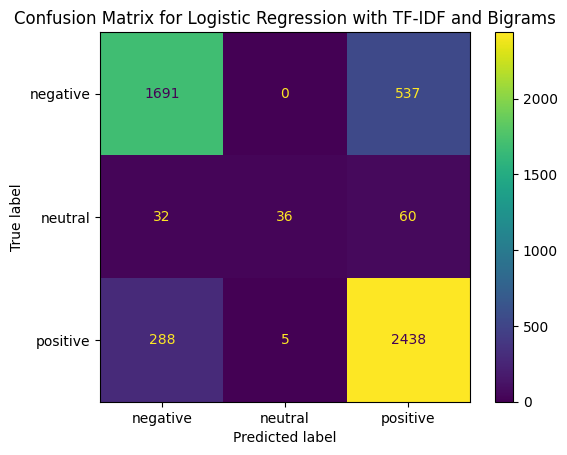

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# 1. تحويل النصوص باستخدام TF-IDF مع n-grams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(fakenews['text'])
y = fakenews['sentiment']

# 2. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# 3. تدريب نموذج Logistic Regression
model = LogisticRegression(C=1, max_iter=200)
model.fit(X_train, y_train)

# 4. التنبؤ وحساب الدقة
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 5. عرض مصفوفة الارتباك
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix for Logistic Regression with TF-IDF and Bigrams")
plt.show()


In [70]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# تحميل بيانات التدريب والاختبار من ملفات CSV
train_file_path = '/content/train 3.csv'
test_file_path = '/content/test 2.csv'

# قراءة بيانات التدريب والاختبار
train_df = pd.read_csv('/content/train 3.csv', on_bad_lines='skip')  # تخطي الصفوف التي تحتوي على أخطاء
test_df = pd.read_csv('/content/test 2.csv', on_bad_lines='skip')  # قراءة بيانات الاختبار

# الاحتفاظ بالأعمدة المهمة فقط
train_df['source'] = 'train'  # إضافة عمود لتحديد مصدر البيانات (التدريب)
test_df['source'] = 'test'  # إضافة عمود لتحديد مصدر البيانات (الاختبار)

# دمج البيانات من الملفين
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# التأكد من أن النصوص لا تحتوي على قيم مفقودة
combined_df['text'] = combined_df['text'].fillna('')

# تطبيق Bag of Words (BoW) لتحويل النصوص إلى تمثيل عددي
bow_vectorizer = CountVectorizer()  # لا نحدد max_features هنا
X_combined_bow = bow_vectorizer.fit_transform(combined_df['text'])  # تحويل النصوص المدمجة

# إذا كان لدينا تصنيفات (labels) في ملف الاختبار، ندمج التصنيفات أيضًا
if 'label' in combined_df.columns:
    y_combined = combined_df['label'].fillna(-1)  # ملء أي تصنيفات مفقودة (لاختبار البيانات)

    # بناء نموذج التصنيف باستخدام Naive Bayes
    model = MultinomialNB()

    # تدريب النموذج باستخدام البيانات المدمجة
    model.fit(X_combined_bow, y_combined)

    # التنبؤ بالتصنيفات على البيانات المدمجة
    combined_predictions = model.predict(X_combined_bow)

    # إضافة التوقعات إلى البيانات المدمجة
    combined_df['predictions'] = combined_predictions

    # حساب الدقة إذا كانت التصنيفات الحقيقية موجودة
    if 'label' in combined_df.columns:
        accuracy = accuracy_score(y_combined, combined_predictions)
        print(f"Accuracy of the model: {accuracy * 100:.2f}%")

# حفظ البيانات المدمجة مع التوقعات في ملف جديد
combined_df.to_csv('combined_predictions.csv', index=False)

# عرض أول بضعة أسطر من النتائج المدمجة
combined_df[['id', 'text', 'predictions']].head()


Accuracy of the model: 78.69%


,id,text,predictions
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0
1,1,Ever get the feeling your life circles the rou...,0.0
2,2,"Why the Truth Might Get You Fired October 29, ...",1.0
3,3,Videos 15 Civilians Killed In Single US Airstr...,0.0
4,4,Print \nAn Iranian woman has been sentenced to...,0.0
